[View in Colaboratory](https://colab.research.google.com/github/akash720/Facial-expression-recognition/blob/master/train.ipynb)

# Importing necessary libraries and downloading files


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical



# Importing dataset



In [0]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'  #to suppress SettingWithCopyWarning

#Reading the dataset
dataset = pd.read_csv("fer2013.csv")

#Obtaining train data where usage is "Training"
train = dataset[dataset["Usage"] == "Training"]

#Obtaining test data where usage is "PublicTest"
test = dataset[dataset["Usage"] == "PublicTest"]

#Converting " " separated pixel values to list
train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

# Preparing X_train, y_train, X_test, y_test

In [0]:
X_train = train.iloc[:, 1].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1].values
y_test = test.iloc[:, 0].values

#np.vstack stack arrays in sequence vertically (picking element row wise)
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)


#Reshape X_train, y_train,X_test,y_test in desired formats
X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print("shape of X_train and y_train is " + str(X_train.shape) +" and " + str(y_train.shape) +" respectively.")
print("shape of X_test and y_test is " + str(X_test.shape) +" and " + str(y_test.shape) +" respectively.")


shape of X_train and y_train is (28709, 48, 48, 1) and (28709, 1) respectively.
shape of X_test and y_test is (3589, 48, 48, 1) and (3589, 1) respectively.


In [0]:
# Change to float datatype
train_data = X_train.astype('float32')
test_data = X_test.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

# Getting number of classes and  input_shape

In [0]:
# Find the unique numbers from the train labels

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


# Defining emotions name

In [0]:
#Defining labels 

def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

# Plotting an image each from train and test set

Text(0.5,1,'Ground Truth : Surprise')

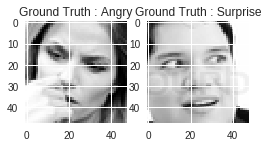

In [0]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(np.squeeze(X_train[2,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[0]))))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(np.squeeze(X_test[1500,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1500]))))


# Defining model architecture

In [0]:
def createModel():
    
    #Model Initialization
    model = Sequential() 
    
    #Adding Input Layer
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    
    #Adding more layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    #Flattening
    model.add(Flatten())
    
    #Adding fully connected layer
    model.add(Dense(512, activation='relu'))
    
    model.add(Dropout(0.6))
    
    #Adding Output Layer
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

# Creating and training 1st model

In [0]:
#Creating 1st model

model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 10, 10, 64)        0         
__________

In [0]:
#Training our 1st model

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 18s 610us/step - loss: 1.8253 - acc: 0.2426 - val_loss: 1.8045 - val_acc: 0.2561
Epoch 2/100
28709/28709 [==============================] - 12s 406us/step - loss: 1.7123 - acc: 0.3085 - val_loss: 1.6334 - val_acc: 0.3539
Epoch 3/100
28709/28709 [==============================] - 12s 407us/step - loss: 1.5560 - acc: 0.3942 - val_loss: 1.4801 - val_acc: 0.4207
Epoch 4/100
28709/28709 [==============================] - 12s 405us/step - loss: 1.4491 - acc: 0.4431 - val_loss: 1.3861 - val_acc: 0.4625
Epoch 5/100
28709/28709 [==============================] - 12s 405us/step - loss: 1.3727 - acc: 0.4734 - val_loss: 1.3504 - val_acc: 0.4812
Epoch 6/100
28709/28709 [==============================] - 12s 406us/step - loss: 1.3043 - acc: 0.5010 - val_loss: 1.3111 - val_acc: 0.4890
Epoch 7/100
28709/28709 [==============================] - 12s 406us/step - loss: 1.2610 - acc: 0.5196 - val_lo

# Evaluating 1st model and plotting curves

In [0]:
#Evaluating model performance

model1.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 1s 355us/step


[1.4770588522071657, 0.6049038729534139]

Text(0.5,1,'Accuracy Curves')

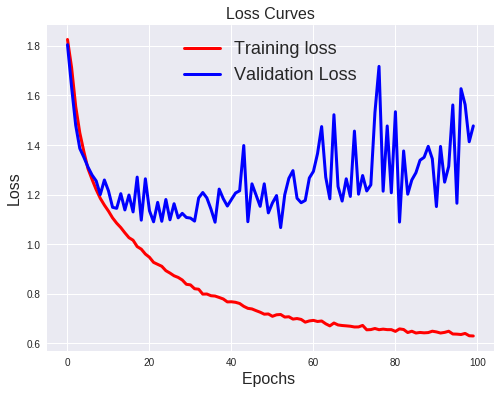

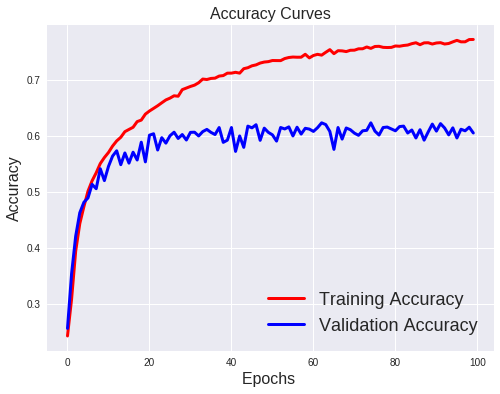

In [0]:
#Plotting accuracy and loss curves for 1st model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

>***As you can see that our model performs well on training set but fails to do so on test set, there must be overfitting. To remove overfitting, we can do data augmentation.***




# Data augmentation 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

# Creating and training 2nd model

In [0]:
#Creating 2nd model and training(fitting)

model2 = createModel()
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 256
epochs = 100

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              )

Epoch 1/100
113/113 [==============================] - 22s 197ms/step - loss: 1.8909 - acc: 0.2420 - val_loss: 1.7932 - val_acc: 0.2502
Epoch 2/100
113/113 [==============================] - 16s 141ms/step - loss: 1.7688 - acc: 0.2700 - val_loss: 1.6760 - val_acc: 0.3174
Epoch 3/100
113/113 [==============================] - 16s 146ms/step - loss: 1.7021 - acc: 0.3121 - val_loss: 1.5655 - val_acc: 0.3982
Epoch 4/100
113/113 [==============================] - 17s 147ms/step - loss: 1.6341 - acc: 0.3546 - val_loss: 1.5058 - val_acc: 0.4163
Epoch 5/100
113/113 [==============================] - 16s 146ms/step - loss: 1.5543 - acc: 0.3935 - val_loss: 1.4159 - val_acc: 0.4439
Epoch 6/100
113/113 [==============================] - 16s 146ms/step - loss: 1.4931 - acc: 0.4178 - val_loss: 1.3745 - val_acc: 0.4592
Epoch 7/100
113/113 [==============================] - 16s 145ms/step - loss: 1.4377 - acc: 0.4425 - val_loss: 1.3016 - val_acc: 0.4946
Epoch 8/100
113/113 [===========================

# Evaluating 2nd model and plotting curves

In [0]:
#Evaluating model performance

model2.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 1s 307us/step


[1.024771803034551, 0.6316522708607437]

Text(0.5,1,'Accuracy Curves')

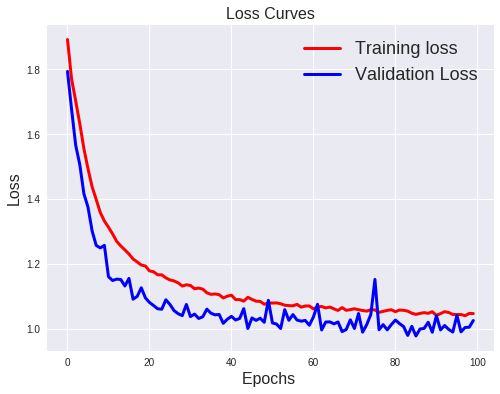

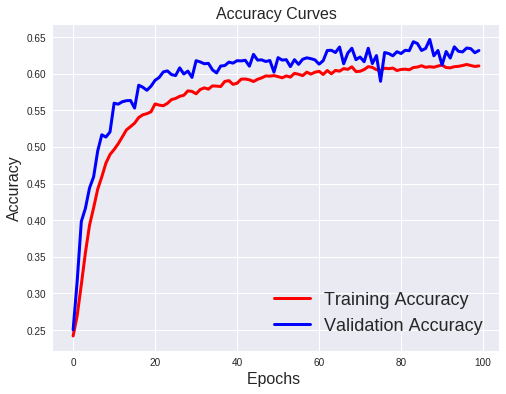

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#Saving our model

In [0]:
#Saving our model

model2.save('my_model3.h5')